In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
ventas_1996 = pd.read_csv('./Data_Csv/VentasTotalesPorProducto1996.csv')
ventas_1997 = pd.read_csv('./Data_Csv/VentasTotalesPorProducto1997.csv')
ordenes_transporte = pd.read_csv('./Data_Csv/OrdenesTotalesTransporte.csv')
ventas_totales = pd.read_csv('./Data_Csv/Ventas_totales_por_cliente.csv')


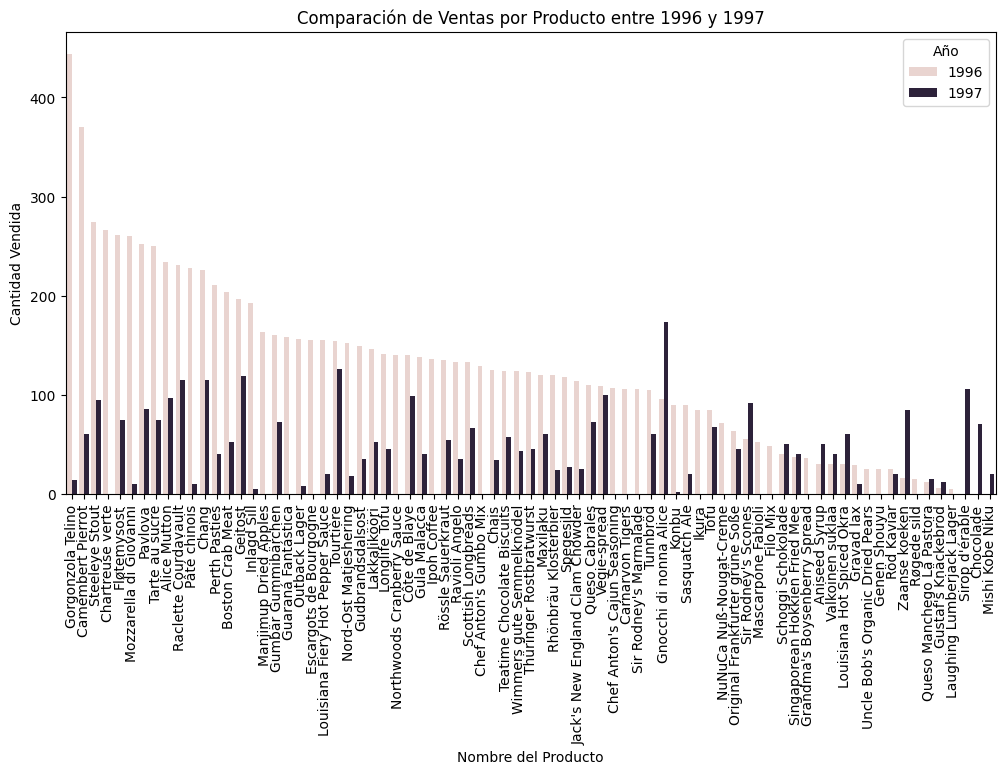

In [9]:
# Visualizar la comparación de ventas por producto entre 1996 y 1997
ventas_1996['Year'] = 1996
ventas_1997['Year'] = 1997

ventas_combined = pd.concat([ventas_1996, ventas_1997])

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='TotalSold', hue='Year', data=ventas_combined)
plt.title('Comparación de Ventas por Producto entre 1996 y 1997')
plt.xlabel('Nombre del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.show()


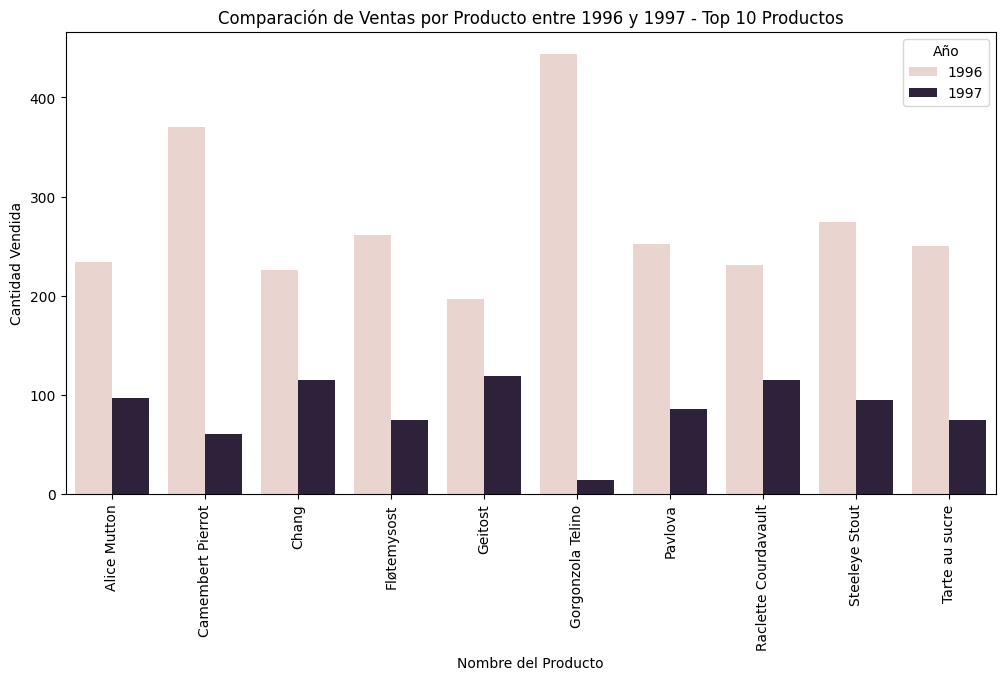

In [15]:
# comparación de ventas de los 10 mejores productos entre 1996 y 1997
ventas_1996['Year'] = 1996
ventas_1997['Year'] = 1997

ventas_combined = pd.concat([ventas_1996, ventas_1997])

ventas_grouped = ventas_combined.groupby(['ProductName', 'Year']).sum().reset_index()

top_10_products = ventas_grouped.groupby('ProductName')['TotalSold'].sum().nlargest(10).index

ventas_top_10 = ventas_grouped[ventas_grouped['ProductName'].isin(top_10_products)]

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='TotalSold', hue='Year', data=ventas_top_10)
plt.title('Comparación de Ventas por Producto entre 1996 y 1997 - Top 10 Productos')
plt.xlabel('Nombre del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=90)
plt.legend(title='Año')

plt.show()


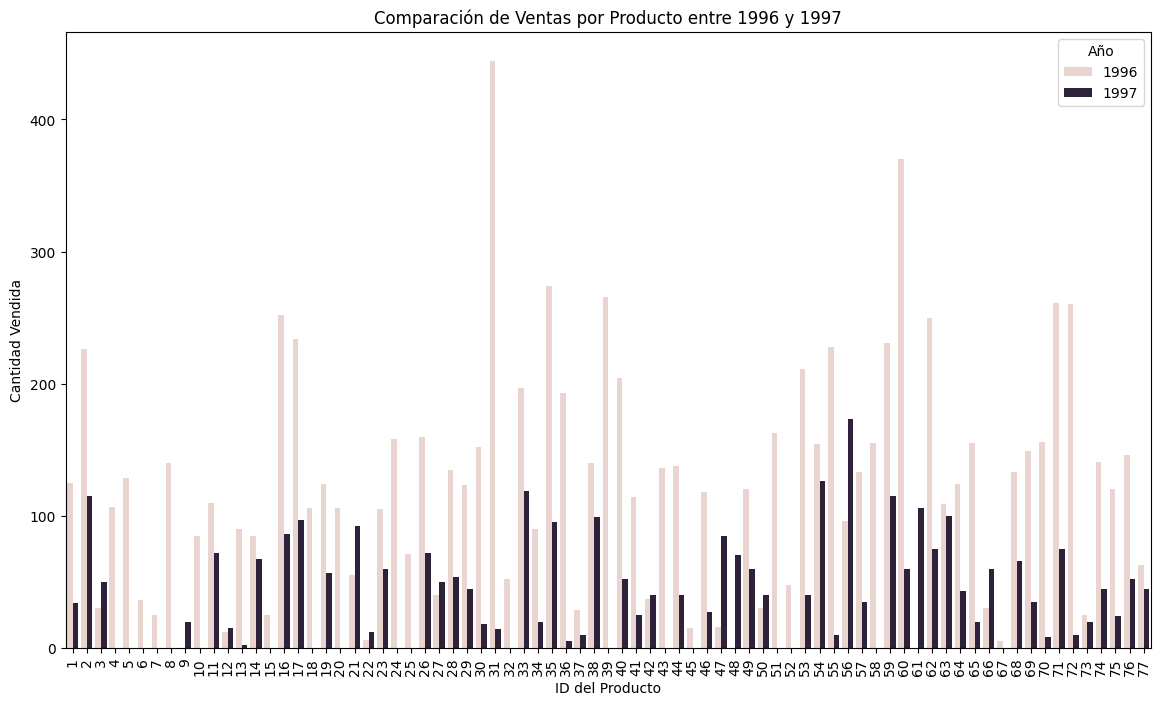

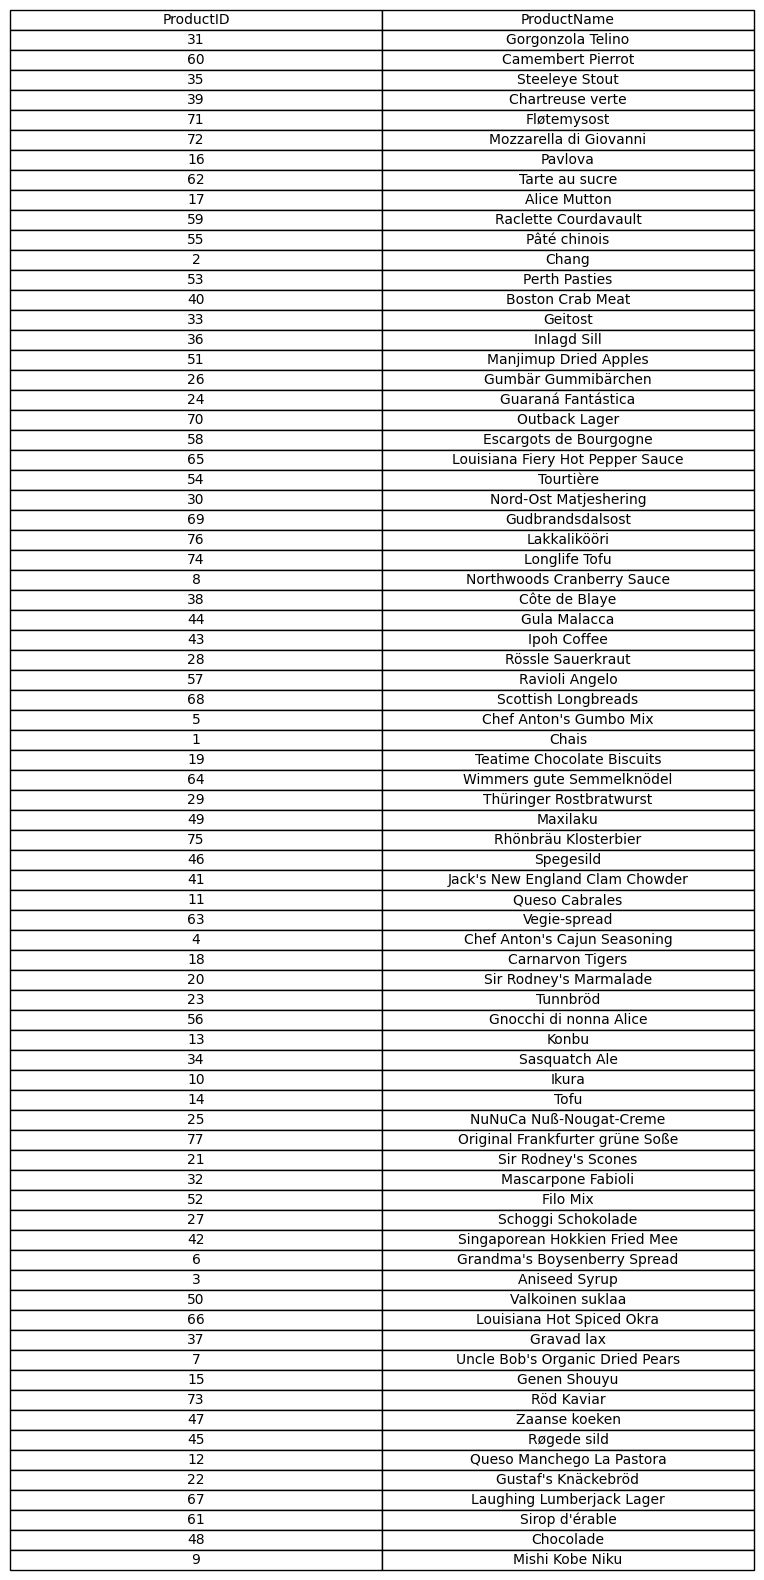

In [32]:
#comparación de ventas por producto entre 1996 y 1997 usando IDs
ventas_1996 = pd.read_csv('VentasTotalesPorProducto1996.csv')
ventas_1997 = pd.read_csv('VentasTotalesPorProducto1997.csv')


ventas_1996['Year'] = 1996
ventas_1997['Year'] = 1997


ventas_combined = pd.concat([ventas_1996, ventas_1997])

productos_nombres = ventas_combined[['ProductID', 'ProductName']].drop_duplicates()


ventas_grouped = ventas_combined.groupby(['ProductID', 'Year']).sum().reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(x='ProductID', y='TotalSold', hue='Year', data=ventas_grouped)
plt.title('Comparación de Ventas por Producto entre 1996 y 1997')
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('tight')
ax.axis('off')
tabla = ax.table(cellText=productos_nombres.values, colLabels=productos_nombres.columns, cellLoc = 'center', loc='center')
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)
plt.show()

